1. לשנות שמות של התמונות לשמות באנגלית
2. מטריצה של כל הדוגמאות(מחברת 20), הפיקסלים של התמונות
3. לתייג תמונות(מחברת 20)
4. לזהות צבעים
5. לזהות פריט


יבוא כל הספריות

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import os
import tensorflow as tf
from sklearn.metrics import classification_report
from keras.preprocessing import image
import glob
from tensorflow import keras
print(tf.__version__)

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/My Drive")
!ls

 2020-10-18-20-37-40
 AI.gform
 all_seasons.csv
 basketball_land.il
'Buttoned (29).jpg'
'CamScanner 12-05-2020 16.39 (1).pdf'
'CamScanner 12-05-2020 16.39 (2).pdf'
'CamScanner 12-05-2020 16.39.pdf'
 Classroom
 Clothes2
'Clothes for the project'
'Clothes for the project (1)'
'Colab Notebooks'
'Collective (1).gslides'
 Collective.gslides
 Project
 SEKER.gsheet
 TEST
'אישור מחלה'
'ארץ הכדורסל-בחירות לאולסטאר ליגת ווינר סל 2021.gform'
'גיליון ללא שם.gsheet'
 הברדלס.gslides
 הברדלס.pptx
'הרצאה לכיתה.gslides'
'הרצאה לכיתה.pptx'
'חיישן זרימת מים.ino'
'חיישן לחות באוויר ארדואינו.ino'
'חיישן לחות בקרקע ארדואינו.ino'
'טופס ללא כותרת.gform'
'מחוון מושגים תנאים לבחירות וזכויות-האדם .gdoc'
'מי אנחנו ומה אנחנו (1).gdoc'
'מי אנחנו ומה אנחנו.docx'
'מי אנחנו ומה אנחנו.gdoc'
'מסמך ללא כותרת (1).gdoc'
'מסמך ללא כותרת (2).gdoc'
'מסמך ללא כותרת (3).gdoc'
'מסמך ללא כותרת.gdoc'
'עותק של טופס ללא כותרת .gform'
 פרויקט.ipynb
'רעיון מספר 1.docx'
'תשובות סקר.gsheet'


ניסיון קליטת תמונה

תחילת קוד

In [ ]:
#תיוג צבעים
def averagecolor(image):
    return np.mean(image, axis=(0, 1))
trainX2 = []
trainY2 = []

path = "Clothes2/"
for label in ('Black', 'Blue', 'Brown', 'Green', 'Orange', 'Pink','Red', 'White', 'Yellow'):
    print ("Loading training images for the label: "+label)
    
    #Load all images inside the subfolder
    for filename in os.listdir(path+"/"+label+"/"): 
        img = cv2.imread(path+label+"/"+filename)
        img_features = averagecolor(img)
        trainX2.append(img_features)
        trainY2.append(label)

Loading training images for the label: Black
Loading training images for the label: Blue
Loading training images for the label: Brown
Loading training images for the label: Green
Loading training images for the label: Orange
Loading training images for the label: Pink
Loading training images for the label: Red
Loading training images for the label: White
Loading training images for the label: Yellow


In [ ]:
#בדיקת צבעים
path = "TEST"
filenames = []
predictedY = []
for filename in os.listdir(path+"/"): 
    img = cv2.imread(path+"/"+filename)
    img_features = averagecolor(img)
    calculated_distances = []
    for card in (trainX2):
        calculated_distances.append(np.linalg.norm(img_features-card))
    prediction =  trainY2[np.argmin(calculated_distances)]
    
    print (filename + ": " + prediction)
    filenames.append(filename)
    predictedY.append(prediction)

Shirt (35).jpg: Red
Sports shirt (34).jpg: Yellow
Sport shoes (33).jpg: Pink
Sports shirt (32).jpg: Blue
Sweatshirt (31).jpg: Black
Polo (30).jpg: Black
Sport sweatshirt (28).jpg: Red
Long sport shirt (27).jpg: Black
Sport Sweatshirt (26).jpg: Orange
Jacket (25).jpg: Black
Sports shirt (24).jpg: Black
Long sport shirt (23).jpg: Pink
Shirt (22).jpg: Blue
Formal pants (21).jpg: Black
Sweatshirt (20).jpg: Blue
Formal pants (19).jpg: Red
Long sport pants (18).jpg: Black
Long Sweatshirt (17).jpg: Blue
Sport sweatshirt (16).jpg: Black
Sports shirt (15).jpg: White
Sweatshirt (14).jpg: Green
Sport sweatshirt (13).jpg: Black
Sports shirt (12).jpg: Black
Sport shoes (11).PNG: Brown
Sport shoes (10).PNG: Black
Swim suit (9).PNG: Blue
Dress (8).PNG: Red
Sport shoes (7).PNG: White
Sport socks (6).PNG: White
Under pants (5).PNG: Blue
Under pants (4).PNG: Black
Sports shirt (3).PNG: White
Sports shirt (2).PNG: Brown
Sport pants (1).PNG: Blue


סיווג על פי סוג בגד

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
           

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
'''train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)'''

'train_images.shape\nlen(train_labels)\ntrain_labels\ntest_images.shape\nlen(test_labels)'

In [ ]:
'''plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()'''

'plt.figure()\nplt.imshow(train_images[0])\nplt.colorbar()\nplt.grid(False)\nplt.show()'

In [ ]:
'''train_images = train_images / 255.0

test_images = test_images / 255.0'''

'train_images = train_images / 255.0\n\ntest_images = test_images / 255.0'

In [ ]:
'''plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()'''

'plt.figure(figsize=(10,10))\nfor i in range(25):\n    plt.subplot(5,5,i+1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n    plt.imshow(train_images[i], cmap=plt.cm.binary)\n    plt.xlabel(class_names[train_labels[i]])\nplt.show()'

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3.6294 - accuracy: 0.7315
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5922 - accuracy: 0.7921
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5430 - accuracy: 0.8099
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5246 - accuracy: 0.8198
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5031 - accuracy: 0.8290
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4807 - accuracy: 0.8336
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4729 - accuracy: 0.8389
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4682 - accuracy: 0.8404
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4601 - accuracy: 0.8418
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.460

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5069 - accuracy: 0.8371

Test accuracy: 0.8371000289916992


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]


array([1.3278831e-21, 5.3730851e-20, 0.0000000e+00, 1.6813884e-22,
       0.0000000e+00, 1.5222667e-01, 0.0000000e+00, 3.8908325e-02,
       7.4043644e-12, 8.0886501e-01], dtype=float32)

In [ ]:
'''np.argmax(predictions[0])
test_labels[0]'''


'np.argmax(predictions[0])\ntest_labels[0]'

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
'''i=0 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()'''

'i=0 \nplt.figure(figsize=(6,3))\nplt.subplot(1,2,1)\nplot_image(i, predictions[i], test_labels, test_images)\nplt.subplot(1,2,2)\nplot_value_array(i, predictions[i],  test_labels)\nplt.show()'

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
'''num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()'''

'num_rows = 5\nnum_cols = 3\nnum_images = num_rows*num_cols\nplt.figure(figsize=(2*2*num_cols, 2*num_rows))\nfor i in range(num_images):\n  plt.subplot(num_rows, 2*num_cols, 2*i+1)\n  plot_image(i, predictions[i], test_labels, test_images)\n  plt.subplot(num_rows, 2*num_cols, 2*i+2)\n  plot_value_array(i, predictions[i], test_labels)\nplt.tight_layout()\nplt.show()'

In [ ]:
# Grab an image from the test dataset.
'''img = test_images[1]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)'''

'img = test_images[1]\nprint(img.shape)\n\nimg = (np.expand_dims(img,0))\nprint(img.shape)'

In [ ]:
'''plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)'''

'plot_value_array(1, predictions_single[0], test_labels)\n_ = plt.xticks(range(10), class_names, rotation=45)'

In [ ]:
#np.argmax(predictions_single[0])

In [ ]:
'''file_list = glob.glob("TEST/*.*")
x=[]
for each in file_list:
 img = image.load_img(each, color_mode = "grayscale", target_size=(28, 28))
 img = image.img_to_array(img)
 img = img.reshape(28, 28)
 img = img.astype('float32')
 img = (255-img)/255.0
 x.append(img)
 plt.figure()
 plt.imshow(img , cmap='Greys')
 plt.grid(False)
 plt.colorbar()
 plt.show()
x=np.array(x)'''

'file_list = glob.glob("TEST/*.*")\nx=[]\nfor each in file_list:\n img = image.load_img(each, color_mode = "grayscale", target_size=(28, 28))\n img = image.img_to_array(img)\n img = img.reshape(28, 28)\n img = img.astype(\'float32\')\n img = (255-img)/255.0\n x.append(img)\n plt.figure()\n plt.imshow(img , cmap=\'Greys\')\n plt.grid(False)\n plt.colorbar()\n plt.show()\nx=np.array(x)'

In [ ]:
lbls = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fashion_mnist = keras.datasets.fashion_mnist
(train_data, train_lbl), (test_data, test_lbl) = fashion_mnist.load_data()
train_data = train_data / 255.0
test_data = test_data / 255.0
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)),
 keras.layers.Dense(128, activation='relu'),
 keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
model.fit(train_data, train_lbl, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4983 - accuracy: 0.8228
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3729 - accuracy: 0.8642
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3360 - accuracy: 0.8772
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.8856
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8922
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2784 - accuracy: 0.8968
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9002
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9034
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9086
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [ ]:
'''file_list = glob.glob("TEST/*.*")
x=[]
for each in file_list:
 img = image.load_img(each, color_mode = "grayscale", target_size=(28, 28))
 img = image.img_to_array(img)
 img = img.astype('float32')
 img = img.reshape(28, 28)
 img = (255-img)/255.0
 x.append(img)
x=np.array(x)
result = model.predict_classes(x)
for i in range(len(result)):
 print(lbls[result[i]], result[i])
print(result)
for i in range(len(result)):
 plt.figure()
 plt.imshow(x[i] , cmap='Greys')
 plt.grid(False)
 plt.axis('off')
 plt.colorbar()
 plt.title(lbls[result[i]])
 plt.show()'''

'file_list = glob.glob("TEST/*.*")\nx=[]\nfor each in file_list:\n img = image.load_img(each, color_mode = "grayscale", target_size=(28, 28))\n img = image.img_to_array(img)\n img = img.astype(\'float32\')\n img = img.reshape(28, 28)\n img = (255-img)/255.0\n x.append(img)\nx=np.array(x)\nresult = model.predict_classes(x)\nfor i in range(len(result)):\n print(lbls[result[i]], result[i])\nprint(result)\nfor i in range(len(result)):\n plt.figure()\n plt.imshow(x[i] , cmap=\'Greys\')\n plt.grid(False)\n plt.axis(\'off\')\n plt.colorbar()\n plt.title(lbls[result[i]])\n plt.show()'

זיהוי על פי צבע וסוג

Color: Black
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/assets
Type: Shirt


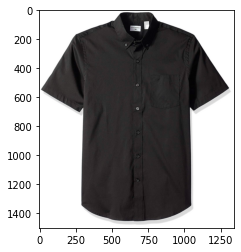

In [ ]:
filename = "/content/drive/MyDrive/Buttoned (29).jpg"
predictedY = []
img = cv2.imread(filename)
img_features = averagecolor(img)
calculated_distances= []
for card in (trainX2):
    calculated_distances.append(np.linalg.norm(img_features-card))
prediction =  trainY2[np.argmin(calculated_distances)]
print ('Color:', prediction)
filenames.append(filename)
plt.imshow(img)

x=[]
img = image.load_img(filename, color_mode = "grayscale", target_size=(28, 28))
img = image.img_to_array(img)
img = img.reshape(28, 28)
img = img.astype('float32')
img = (255-img)/255.0
x.append(img)
x=np.array(x)
result = np.argmax(model.predict(x), axis=-1)
model.save('/content/drive/MyDrive/Project')
for i in range(len(result)):
 print('Type:', lbls[result[i]])

In [ ]:
Storage=np.zeros((9, 10))
Colors = {'Black':0, 'Blue':1, 'Brown':2, 'Green':3, 'Orange':4, 'Pink':5,'Red':6, 'White':7, 'Yellow':8}
prediction
result
Storage[Colors[prediction],result]=1

print(Storage)


In [ ]:
#install app , just in the first time 
!pip install -q streamlit

In [ ]:
import streamlit as st
import numpy as np
from PIL import Image

st.title('הפרוייקט של אילאי')
st.balloons()
st.write("בבקשה להעלות תמונה  ")

img_file_buffer = st.file_uploader("Upload an image")
if img_file_buffer is not None:
    image = Image.open(img_file_buffer)
    img_array = np.array(image) # if you want to pass it to OpenCV
    st.image(image, caption="The caption", use_column_width=True)

In [ ]:
!ls -la 

# !ipython nbconvert — to python *.ipynb
!streamlit run /content/sample_data/ee.py

In [ ]:
!pwd